<a href="https://colab.research.google.com/github/Abhiram-k1/Elevate-Labs-AI-ML-Internship/blob/main/Elevate_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Accuracy: 0.9853658536585366
Pruned Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.9853658536585366
Decision Tree CV Mean: 1.0
Random Forest CV Mean: 0.9970731707317073


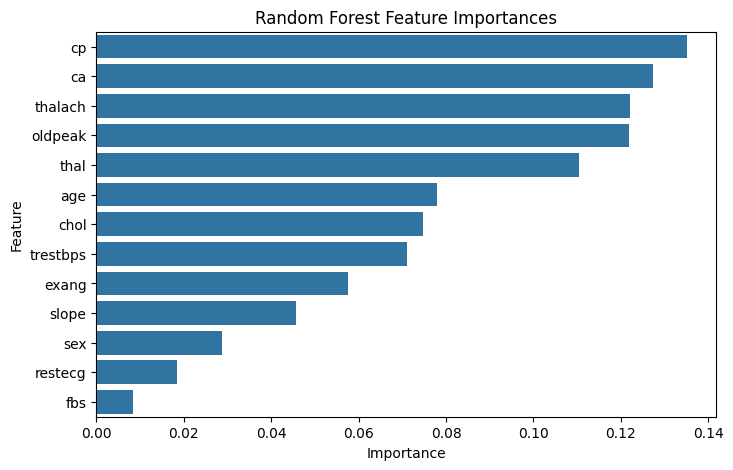

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# Load dataset
df = pd.read_csv('heart.csv')

# Features & Target
X = df.drop('target', axis=1)
y = df['target']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Graphviz Visualization
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)  # Saves as decision_tree.png
graph.view("decision_tree")  # Opens the tree

# Predictions
y_pred_dt = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)

# 2. Pruned Decision Tree
dt_model_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_pruned.fit(X_train, y_train)
y_pred_pruned = dt_model_pruned.predict(X_test)
dt_pruned_acc = accuracy_score(y_test, y_pred_pruned)

# 3. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 4. Feature Importances
importances = rf_model.feature_importances_
fi_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# 5. Cross-Validation
cv_scores_dt = cross_val_score(dt_model, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5)

# Print Results
print("Decision Tree Accuracy:", dt_acc)
print("Pruned Decision Tree Accuracy:", dt_pruned_acc)
print("Random Forest Accuracy:", rf_acc)
print("Decision Tree CV Mean:", cv_scores_dt.mean())
print("Random Forest CV Mean:", cv_scores_rf.mean())

# Plot Feature Importances
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Random Forest Feature Importances")
plt.show()
